In [1]:
 !nvidia-smi

zsh:1: command not found: nvidia-smi


In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
import time, h5py, os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
%matplotlib inline
print(device_lib.list_local_devices())

print("TensorFlow version: {}".format(tf.__version__))


/Users/filippomoscatelli/Desktop/Modelli della percezione/Pyton/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16275299104407473081
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 4719239545740948237
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]
TensorFlow version: 2.16.2


2024-12-09 11:56:16.106292: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-09 11:56:16.106318: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-09 11:56:16.106321: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-09 11:56:16.106644: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-09 11:56:16.106658: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### - Import Fashion-MNIST Dataset
Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. <br>
Each example is a 28×28 grayscale image, associated with a label from 10 classes.<br>
 
![alt text](http://lanzarotti.di.unimi.it/images_notebook/fashion-mnist.png)


In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

mnist_fashion = tf.keras.datasets.fashion_mnist

(x_learn, y_learn),(x_test, y_test) = mnist_fashion.load_data()
x_learn, x_test = x_learn / 255.0, x_test / 255.0 # normalization 
x_train, x_val, y_train, y_val = train_test_split(x_learn, y_learn, test_size=0.2, random_state=42) # split learn in train,val

print(x_train.shape, x_val.shape, x_test.shape)

(48000, 28, 28) (12000, 28, 28) (10000, 28, 28)


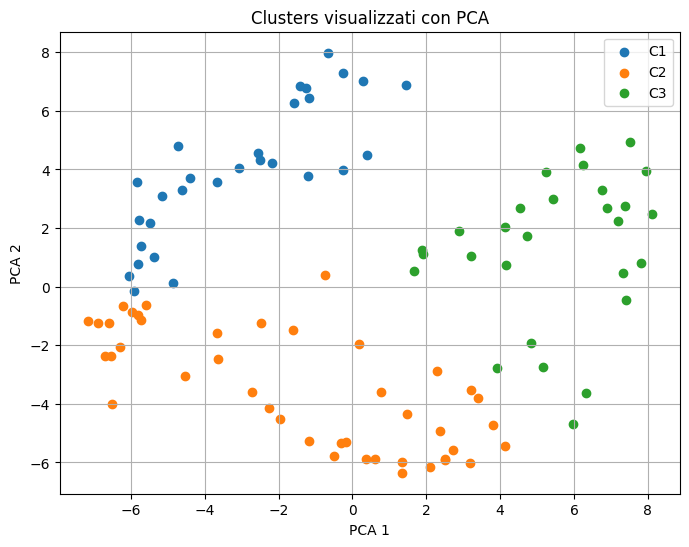

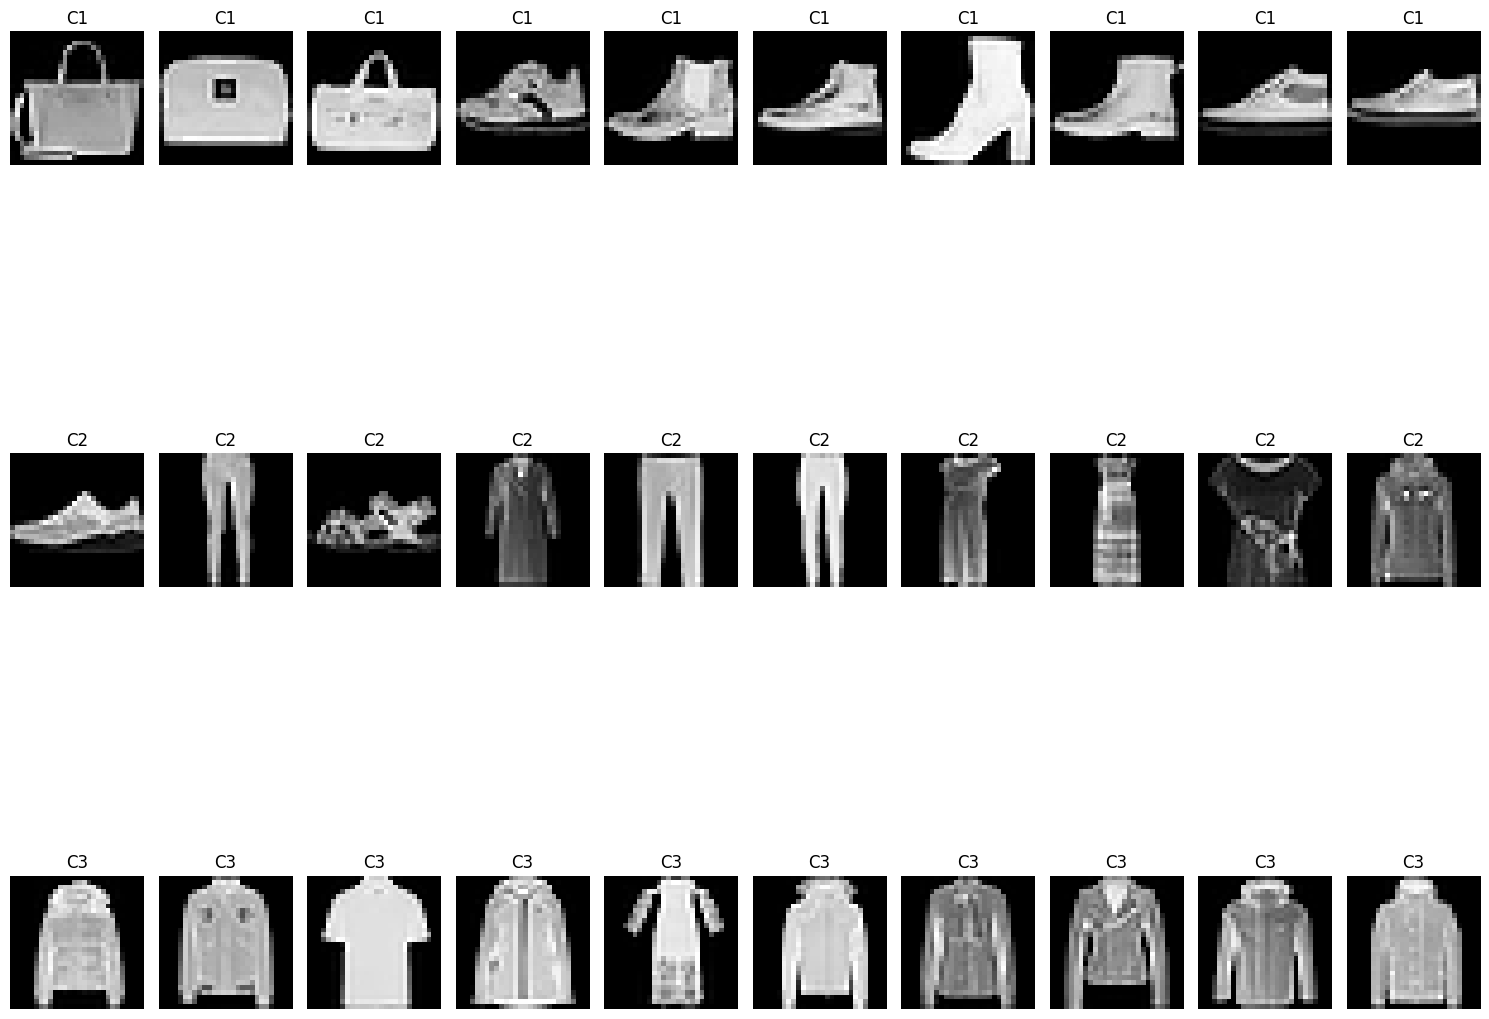

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import fashion_mnist
import os

# Crea la cartella 'risultati' se non esiste
output_dir = 'risultati'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Carica i dati
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Appiattisci le immagini (784 dimensioni) e normalizza
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0

# Seleziona 100 immagini casuali
np.random.seed(42)
sample_indices = np.random.choice(x_train_flat.shape[0], 100, replace=False)
x_sample = x_train_flat[sample_indices]
images_sample = x_train[sample_indices]  # Versione originale per visualizzazione

# Riduzione della dimensionalità con PCA (2 componenti per il grafico)
pca = PCA(n_components=2)
x_sample_pca = pca.fit_transform(x_sample)

# Applica K-Means su 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_sample_pca)
y_kmeans = kmeans.predict(x_sample_pca)

# Visualizza i cluster su un grafico PCA
plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_points = x_sample_pca[y_kmeans == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'C{cluster + 1}')
plt.legend()
plt.title('Clusters visualizzati con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.savefig(os.path.join(output_dir, 'clusters_pca.png'))
plt.show()

# Visualizza 10 immagini per cluster
plt.figure(figsize=(15, 15))
for cluster in range(3):
    cluster_indices = np.where(y_kmeans == cluster)[0][:10]  # Prendi 10 immagini per cluster
    for i, idx in enumerate(cluster_indices):
        plt.subplot(3, 10, cluster * 10 + i + 1)
        plt.imshow(images_sample[idx], cmap='gray')
        plt.axis('off')
        plt.title(f'C{cluster + 1}')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'clustered_images.png'))
plt.show()

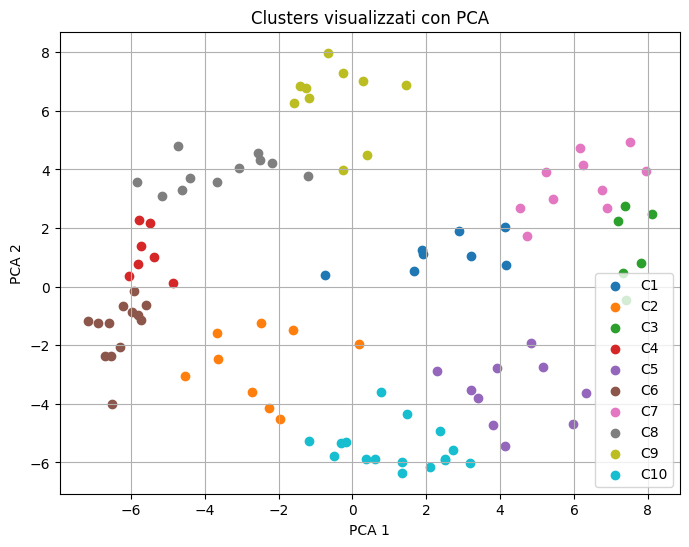

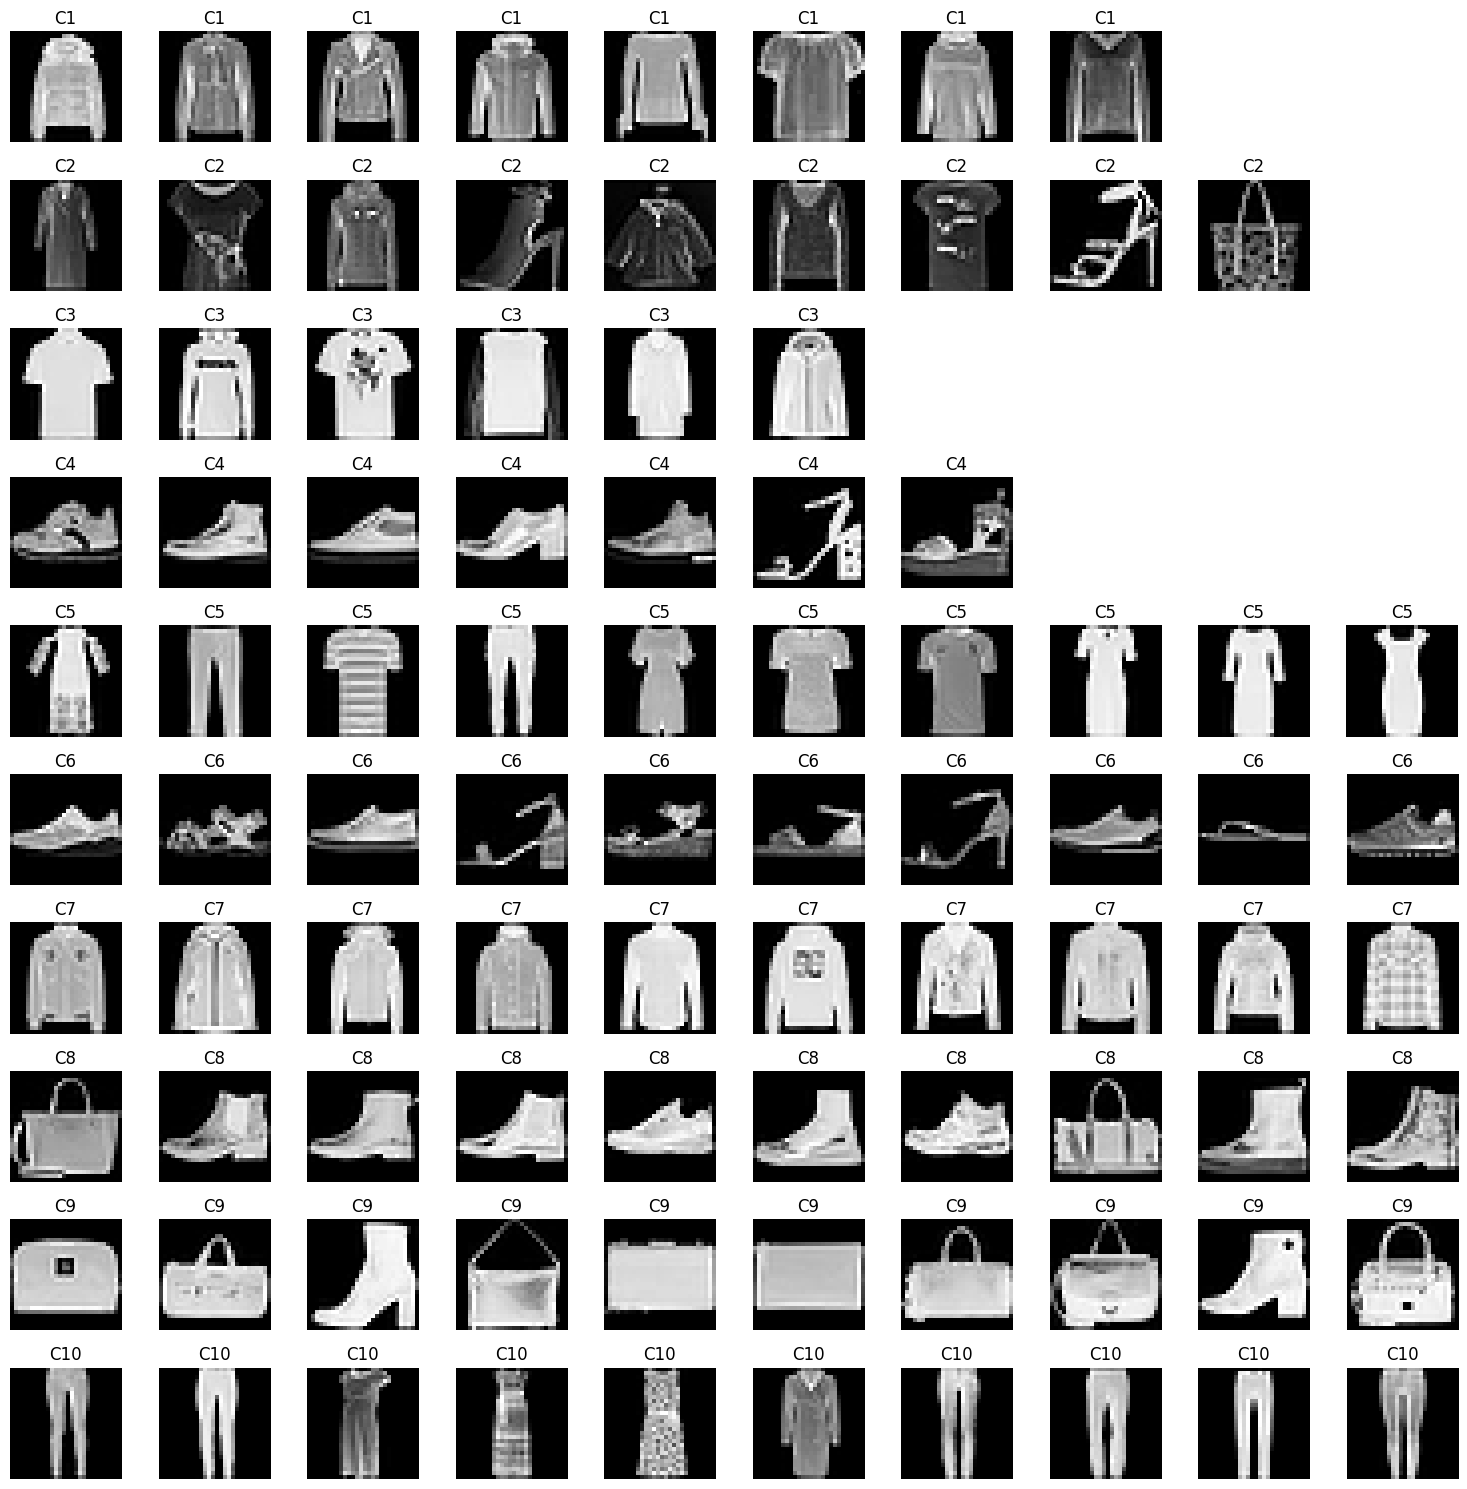

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tensorflow.keras.datasets import fashion_mnist
import os

# Crea la cartella 'risultati' se non esiste
output_dir = 'risultati'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Carica i dati
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Appiattisci le immagini (784 dimensioni) e normalizza
x_train_flat = x_train.reshape(x_train.shape[0], -1) / 255.0

# Seleziona 100 immagini casuali
np.random.seed(42)
sample_indices = np.random.choice(x_train_flat.shape[0], 100, replace=False)
x_sample = x_train_flat[sample_indices]
images_sample = x_train[sample_indices]  # Versione originale per visualizzazione

# Riduzione della dimensionalità con PCA (2 componenti per il grafico)
pca = PCA(n_components=2)
x_sample_pca = pca.fit_transform(x_sample)

# Applica K-Means su 10 cluster
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_sample_pca)
y_kmeans = kmeans.predict(x_sample_pca)

# Visualizza i cluster su un grafico PCA
plt.figure(figsize=(8, 6))
for cluster in range(10):
    cluster_points = x_sample_pca[y_kmeans == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'C{cluster + 1}')
plt.legend()
plt.title('Clusters visualizzati con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid()
plt.savefig(os.path.join(output_dir, 'clusters_pca_10.png'))
plt.show()

# Visualizza 10 immagini per cluster
plt.figure(figsize=(15, 15))
for cluster in range(10):
    cluster_indices = np.where(y_kmeans == cluster)[0][:10]  # Prendi 10 immagini per cluster
    for i, idx in enumerate(cluster_indices):
        plt.subplot(10, 10, cluster * 10 + i + 1)
        plt.imshow(images_sample[idx], cmap='gray')
        plt.axis('off')
        plt.title(f'C{cluster + 1}')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'clustered_images_10.png'))
plt.show()